In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ydata_profiling as yp

In [3]:
sns.set_style('darkgrid')
sns.set_palette('crest_r')
my_color = '#1e90c9'

## Remove warnings

In [4]:
import warnings 
warnings.simplefilter('ignore')

## Read Data

In [5]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

## data Exploration

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape

(1000, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [10]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [11]:
df.duplicated().sum()

0

## Data Cleaning

In [12]:
df = df.drop(['Invoice ID'], axis = 1)

In [13]:
branch_distribution = df.Branch.value_counts().sort_index()

Text(0.5, 1.0, 'Branch Distribution')

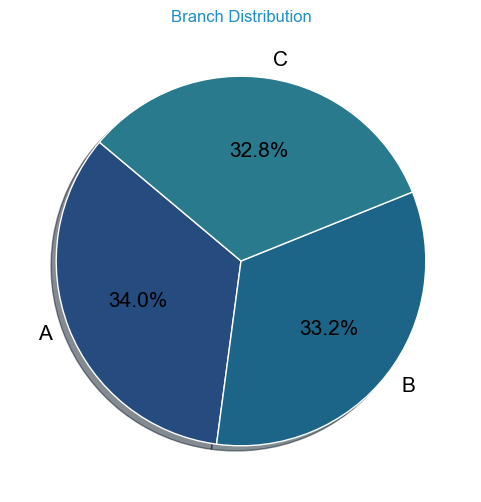

In [14]:
plt.figure(figsize = (6, 6))
plt.pie(branch_distribution, labels = branch_distribution.index, autopct = '%1.1f%%', startangle = 140, shadow = True, textprops={'color': 'black', 'fontsize': 15})
plt.title('Branch Distribution', fontsize = 12, color = my_color)

In [15]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [16]:
df1 = df[df['City'] == 'Yangon'] 
df2 = df[df['City'] == 'Mandalay']
df3 = df[df['City'] == 'Naypyitaw']

df1[df1['Branch'] != 'A']

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [17]:
df2[df2['Branch'] != 'B']

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [18]:
df3[df3['Branch'] != 'C']

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


### two columns called "Branch" and "City" is the samething lets drop one of them  

In [19]:
df = df.drop(['Branch'], axis =1)

In [20]:
df['Customer type'].value_counts()


Customer type
Member    501
Normal    499
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

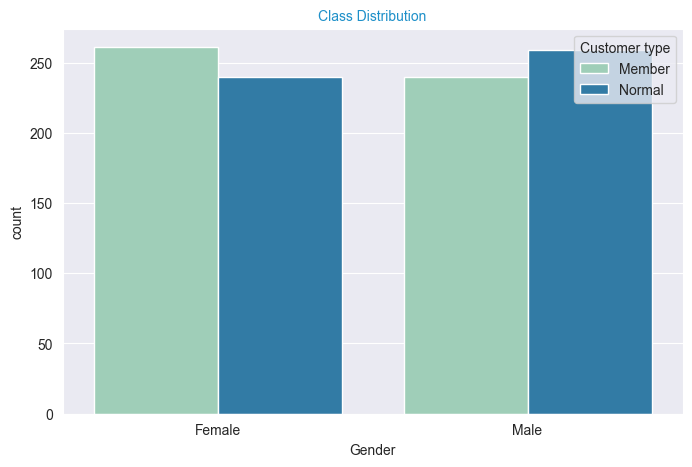

In [21]:
fig, ax = plt.subplots(1,figsize = (8, 5))
sns.countplot(x = 'Gender', hue = 'Customer type', data = df, palette = 'YlGnBu', ax = ax)
ax.set_title('Class Distribution', fontsize = 10, color = my_color)

### most of how take membership in the market are females maybe we need to attract males to take membership

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [23]:
df['Date'].min()

Timestamp('2019-01-01 00:00:00')

In [24]:
df['Date'].max()

Timestamp('2019-03-30 00:00:00')

### there is no wrong data in this column

In [25]:
df_jan = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-01-31')]
df_feb = df[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-28')]
df_mar = df[(df['Date'] >= '2019-03-01') & (df['Date'] <= '2019-03-30')]

Text(0.5, 1.0, 'Membership Distribution-mar')

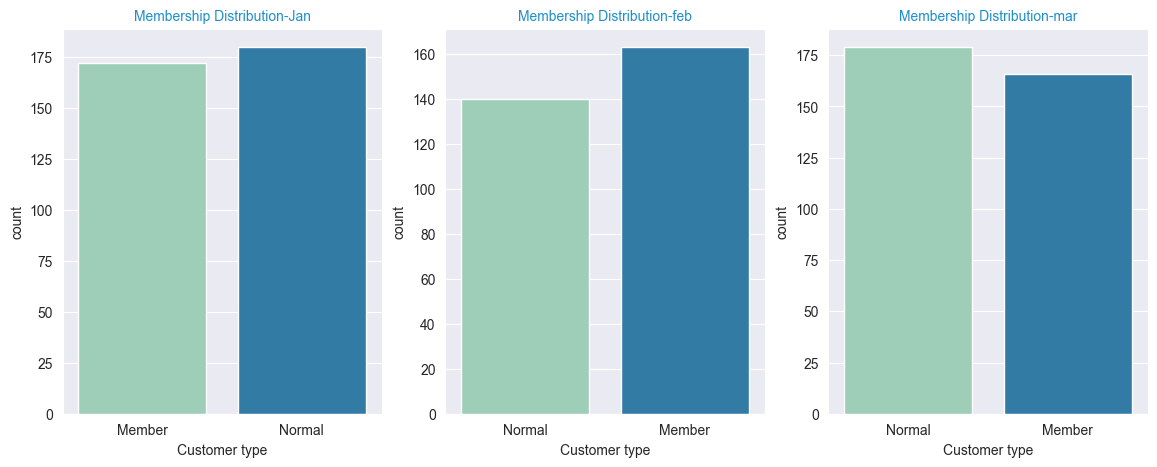

In [26]:
fig, ax = plt.subplots(1,3, figsize = (14, 5))
sns.countplot(x = 'Customer type', data = df_jan, palette = 'YlGnBu', ax = ax[0])
ax[0].set_title('Membership Distribution-Jan', fontsize = 10, color = my_color)

sns.countplot(x = 'Customer type', data = df_feb, palette = 'YlGnBu', ax = ax[1])
ax[1].set_title('Membership Distribution-feb', fontsize = 10, color = my_color)

sns.countplot(x = 'Customer type', data = df_mar, palette = 'YlGnBu', ax = ax[2])
ax[2].set_title('Membership Distribution-mar', fontsize = 10, color = my_color)

In [27]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

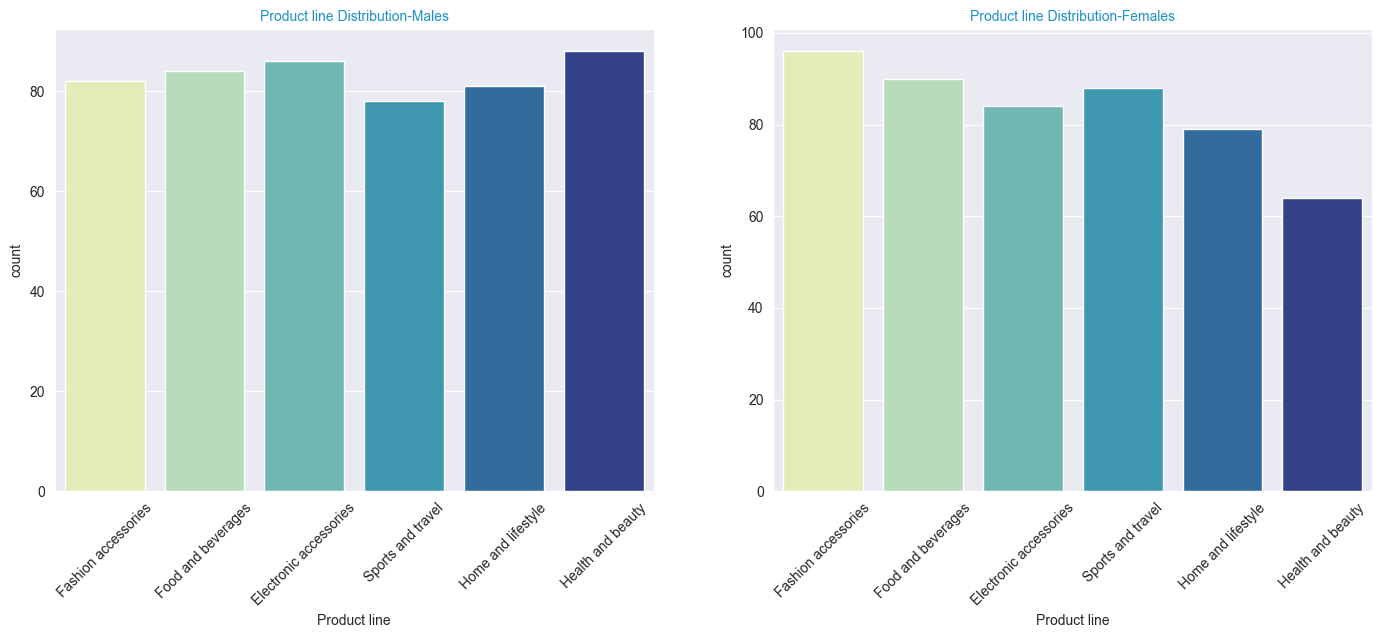

In [28]:
order = df['Product line'].value_counts().index

fig, ax = plt.subplots(1,2, figsize = (17, 6))
sns.countplot(x = 'Product line', data = df[df['Gender'] == 'Male'], palette = 'YlGnBu', ax = ax[0], order=order)
ax[0].set_title('Product line Distribution-Males', fontsize = 10, color = my_color)
ax[0].tick_params(axis='x', rotation=45) 

sns.countplot(x = 'Product line', data = df[df['Gender'] == 'Female'], palette = 'YlGnBu', ax = ax[1], order=order)
ax[1].set_title('Product line Distribution-Females', fontsize = 10, color = my_color)
ax[1].tick_params(axis='x', rotation=45) 

### We need to develop the health and beauty business line for women, as well as sports and travel for men

<Axes: xlabel='Unit price', ylabel='Count'>

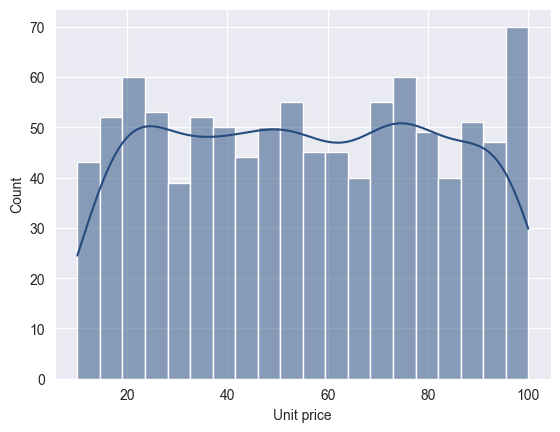

In [29]:
sns.histplot(data = df, x = 'Unit price', bins = 20, palette = 'coolwarm', kde = True)

### from data description we notice that there is two column have the same mean they are ['gross income', 'Tax 5%'] let's drop one of them 

In [30]:
df = df.drop(['gross income'], axis =1)

<Axes: xlabel='Unit price', ylabel='Quantity'>

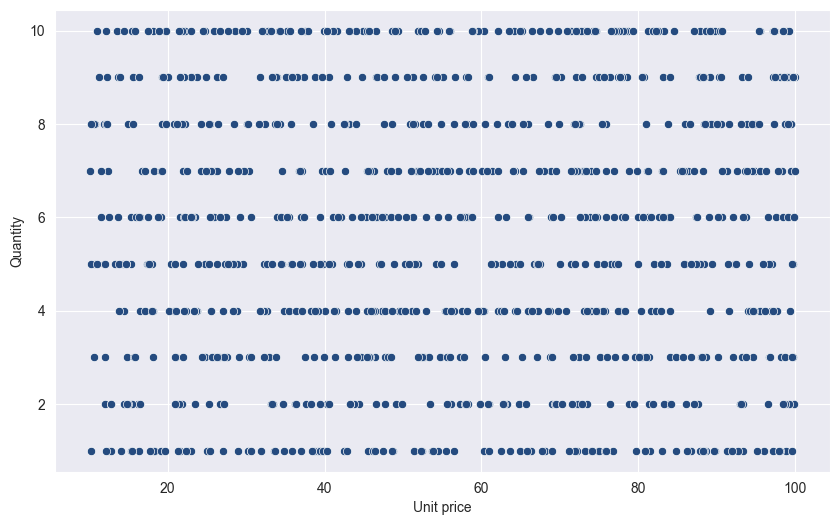

In [31]:
plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'Unit price', y = 'Quantity', data = df)

### there is no relation between the Unit Price Amd quantity bought

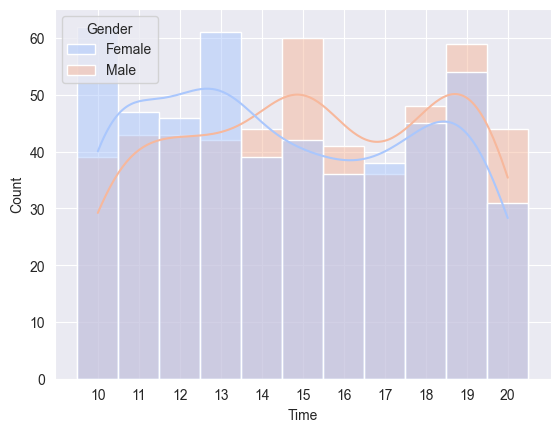

In [32]:
df['Time'] = df['Time'].str[:2]

df_sorted_time = df.sort_values(by='Time')

sns.histplot(data=df_sorted_time, x='Time', hue='Gender', palette='coolwarm', kde=True)
plt.show()


### Females target time between 10.5 to 13.5 and between 17.5 to 19 
### Males target time between 13.5 to 15.5 and between 18 to 19.5 

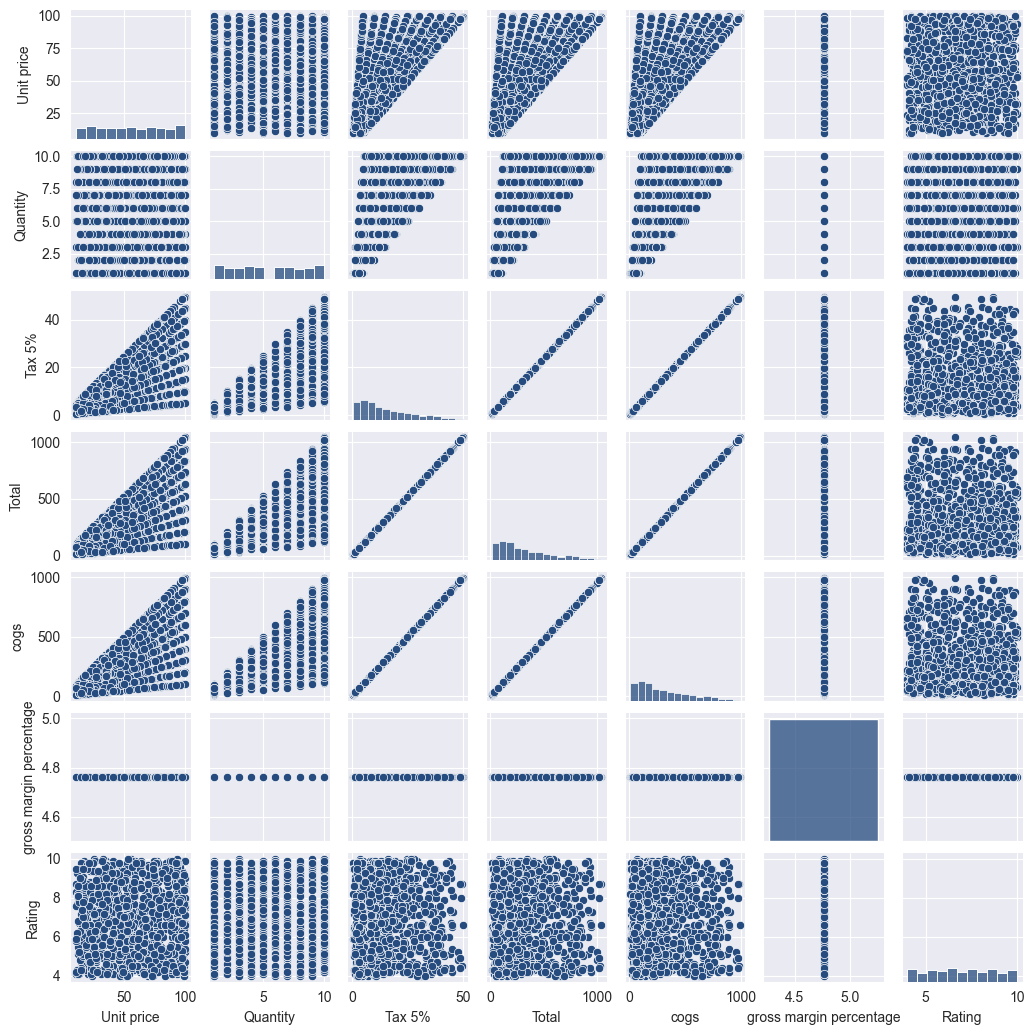

In [33]:
sns.pairplot(df, height=1.5)  


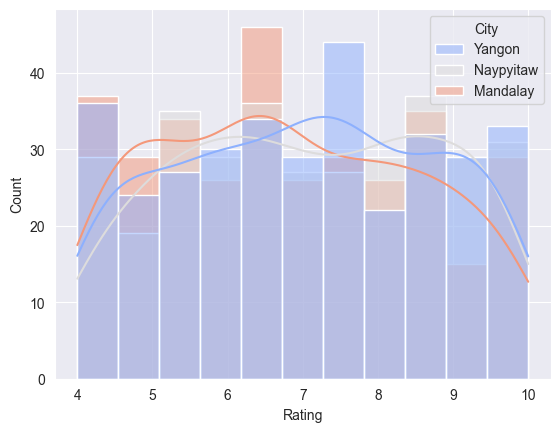

In [34]:
sns.histplot(data=df, x='Rating', hue='City', palette='coolwarm', kde=True)
plt.show()


Text(0.5, 1.0, 'payment Distribution-Mandalay')

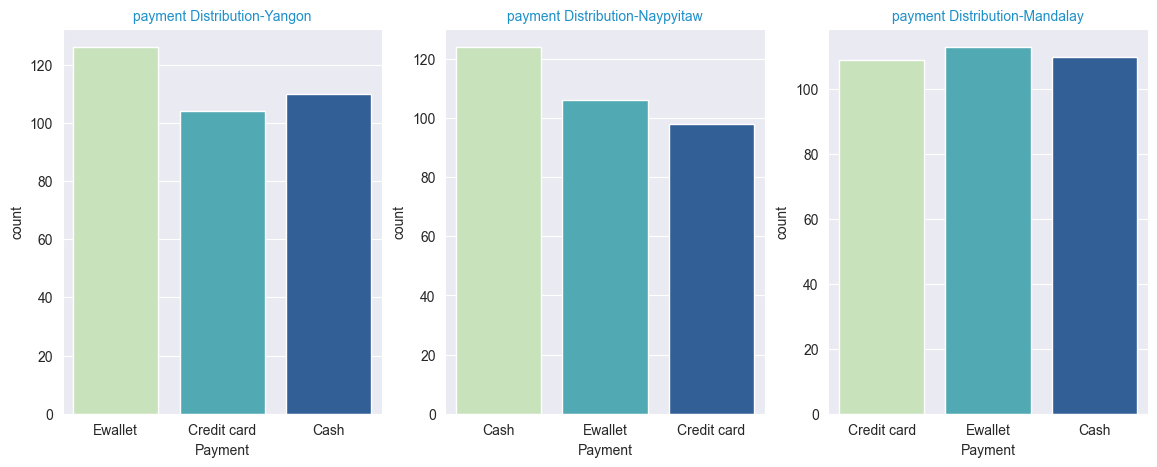

In [35]:
fig, ax = plt.subplots(1,3, figsize = (14, 5))
sns.countplot(x = 'Payment', data = df[df['City'] == 'Yangon'], palette = 'YlGnBu', ax = ax[0])
ax[0].set_title('payment Distribution-Yangon', fontsize = 10, color = my_color)

sns.countplot(x = 'Payment', data = df[df['City'] == 'Naypyitaw'], palette = 'YlGnBu', ax = ax[1])
ax[1].set_title('payment Distribution-Naypyitaw', fontsize = 10, color = my_color)

sns.countplot(x = 'Payment', data = df[df['City'] == 'Mandalay'], palette = 'YlGnBu', ax = ax[2])
ax[2].set_title('payment Distribution-Mandalay', fontsize = 10, color = my_color)

### In ['Yangon', 'Naypyitqw'] we should chek the Quality of credit card service


Text(0.5, 1.0, 'Quantity Distribution-Mandalay')

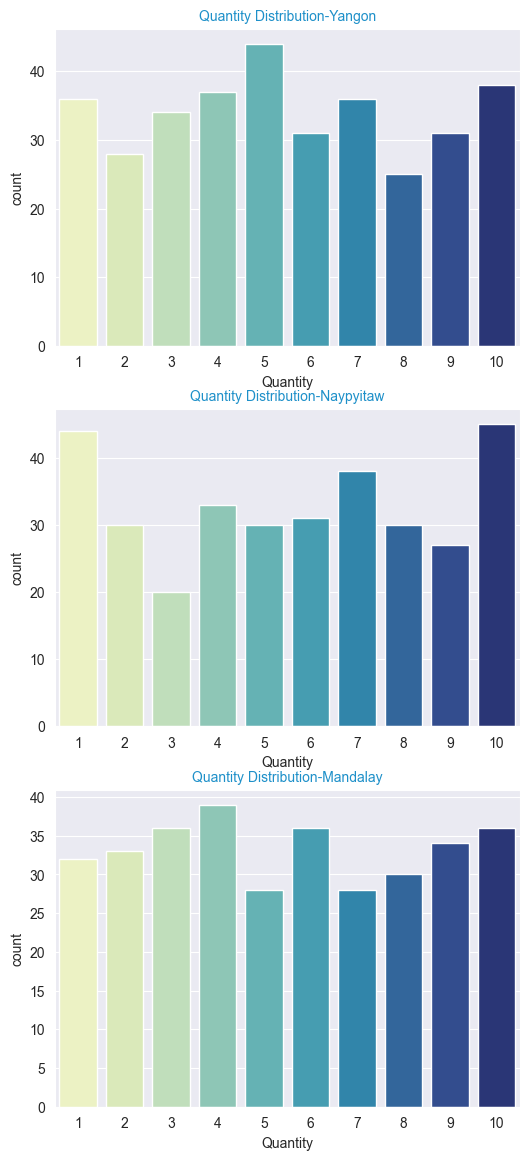

In [36]:
fig, ax = plt.subplots(3,1, figsize = (6, 14))
sns.countplot(x = 'Quantity', data = df[df['City'] == 'Yangon'], palette = 'YlGnBu', ax = ax[0])
ax[0].set_title('Quantity Distribution-Yangon', fontsize = 10, color = my_color)

sns.countplot(x = 'Quantity', data = df[df['City'] == 'Naypyitaw'], palette = 'YlGnBu', ax = ax[1])
ax[1].set_title('Quantity Distribution-Naypyitaw', fontsize = 10, color = my_color)

sns.countplot(x = 'Quantity', data = df[df['City'] == 'Mandalay'], palette = 'YlGnBu', ax = ax[2])
ax[2].set_title('Quantity Distribution-Mandalay', fontsize = 10, color = my_color)

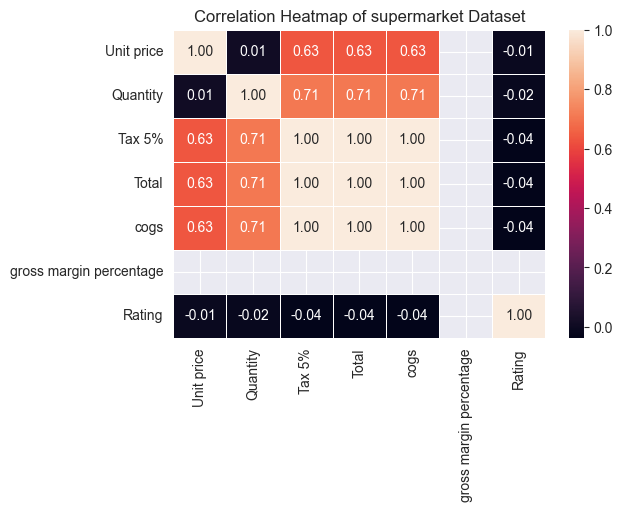

In [37]:
num_cols = df.select_dtypes(include=['number'])
correlation_matrix = num_cols.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of supermarket Dataset')
plt.show()
